### Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [80]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [81]:
#importing the dataset using read_csv
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


By looking at the dataset and problem statement, I can say that Income is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [82]:
#Checking shape
df.shape

(32560, 15)

Our dataset has 32560 rows and 15 columns

In [83]:
#Checking missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

I don't see any missing values in this dataset

In [84]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
    Age               
    Workclass         
    Fnlwgt            
    Education         
    Education_num     
    Marital_status    
    Occupation        
    Relationship      
    Race              
    Sex               
    Capital_gain      
    Capital_loss      
    Hours_per_week    
    Native_country    
                
       
----------------------------------------------------  
   Output feature:
- Income (Prediction task is to determine whether a person makes over 50K a year.)

In [85]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week,

I can see there are no empty observations in dataset

In [86]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th            

I notice there are a lot of '?' values in our dataset. We will have to replace those values.

In [87]:
#treating ? values 
df[df == ' ?'] = np.nan  #converting ? to NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


I can see that the columns workclass, occupation, and native_country contains null values.

In [88]:
#Treating NAN. I'll be using mode as all 3 are categorical columns.
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


I've succeffully treated all NANs

In [89]:
#Checking unique values
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

I see that all the features are useful as unique value is more than 2 and less than total rows.

A point to note here, Education & Education_num shows similar unique values. So i can drop any 1 of them after analysis.

In [90]:
#Checking data type of columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
- Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
- There are no Float Datatypes in the dataset.

## EDA

<AxesSubplot:xlabel='Income', ylabel='count'>

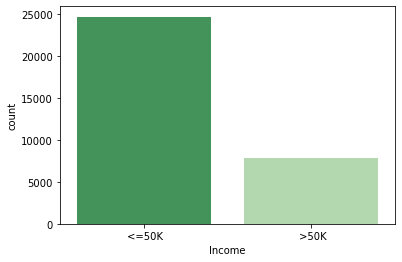

In [91]:
#Analysing our target variable 
sns.countplot(df["Income"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!
- The number of people earning more than 50K dollars a year is one third of the people earning less than it.
- Also, I see class imbalance which I will treat later.

<AxesSubplot:xlabel='Age', ylabel='count'>

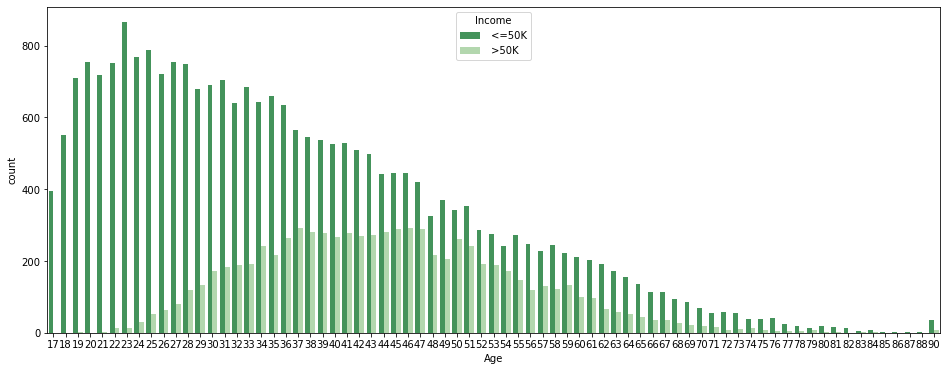

In [92]:
#Checking Income of Individuals of Different Age
plt.figure(figsize=(16,6))
sns.countplot(df["Age"],hue=df["Income"],palette="Greens_r", orient ="v")

We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.
For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it.

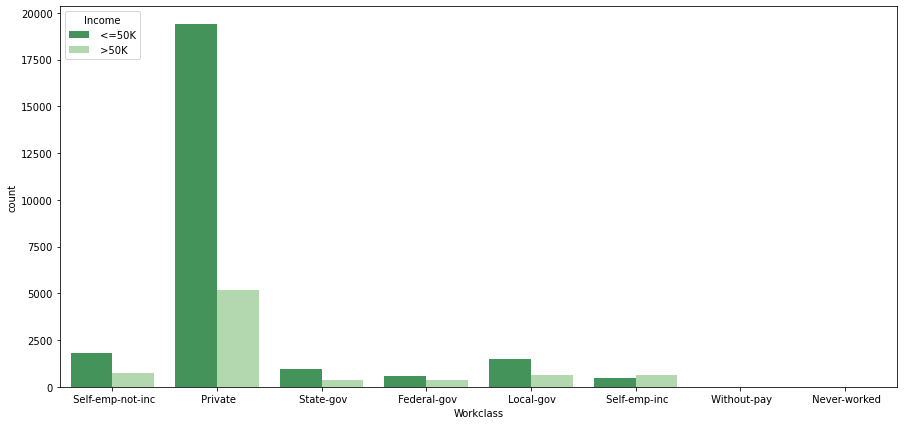

In [93]:
#Checking Income of Individuals of Different Working CLasses
plt.figure(figsize=(15,7))
sns.countplot(df["Workclass"],hue=df["Income"],palette="Greens_r")
plt.show()

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.
- It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

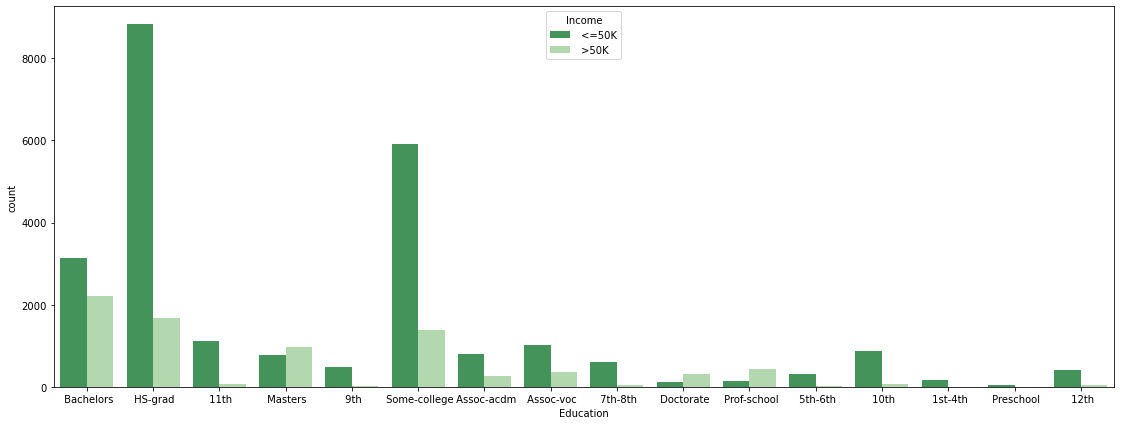

In [94]:
#checking Income of Individuals of Different Education Levels
plt.figure(figsize=(19,7))
sns.countplot(df["Education"],hue=df["Income"],palette="Greens_r")
plt.show()

We can draw a few insightful conclusions from this graph.

- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars a year. Most of the people end up earning below 50K.
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars a year.

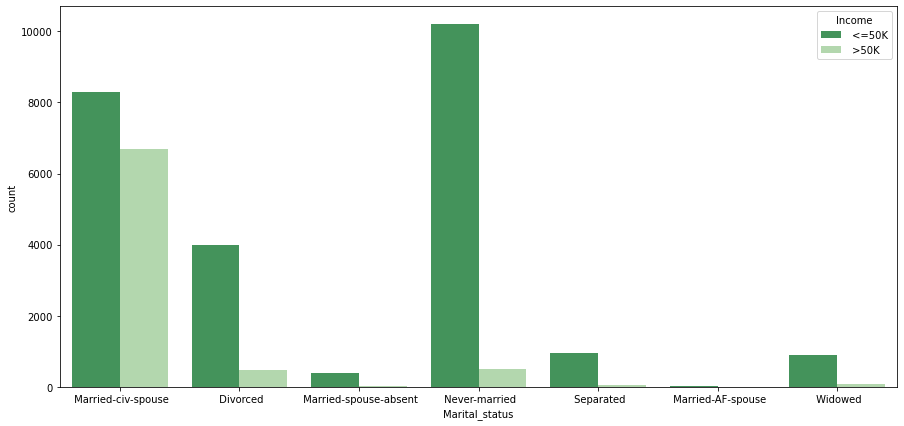

In [95]:
#checking Income of Individuals with Different Marital status
plt.figure(figsize=(15,7))
sns.countplot(df["Marital_status"],hue=df["Income"],palette="Greens_r")
plt.show()

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.

For others, there are less than 25% of the adults earning more than 50K dollars an year.

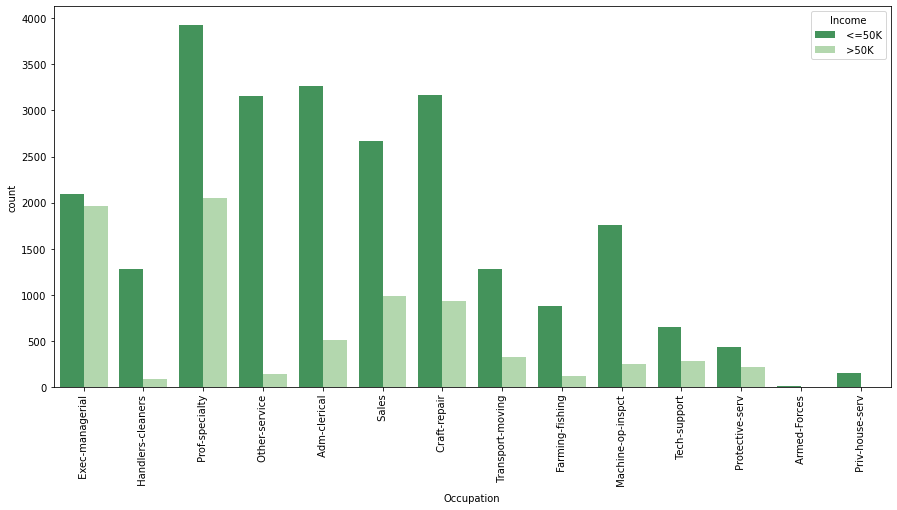

In [96]:
#checking Income of Individuals of Different Occupations
plt.figure(figsize=(15,7))
sns.countplot(df["Occupation"],hue=df["Income"],palette="Greens_r")
plt.xticks(rotation = 90)
plt.show()

A few points to note over here:-

- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

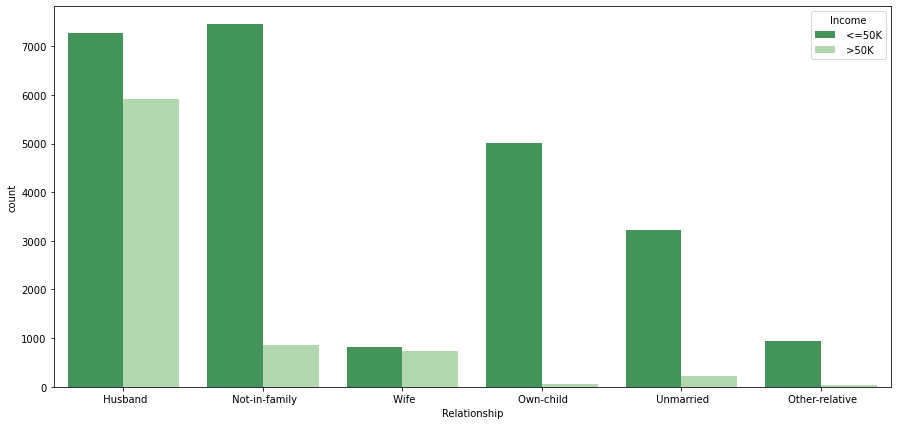

In [97]:
#checking Income of Individuals of Different Relationship
plt.figure(figsize=(15,7))
sns.countplot(df["Relationship"],hue=df["Income"],palette="Greens_r")
#plt.xticks(rotation = 90)
plt.show()

- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Not-in-family, Own-child, Other-relative & Unmarried people earning more than 50K dollars an year.

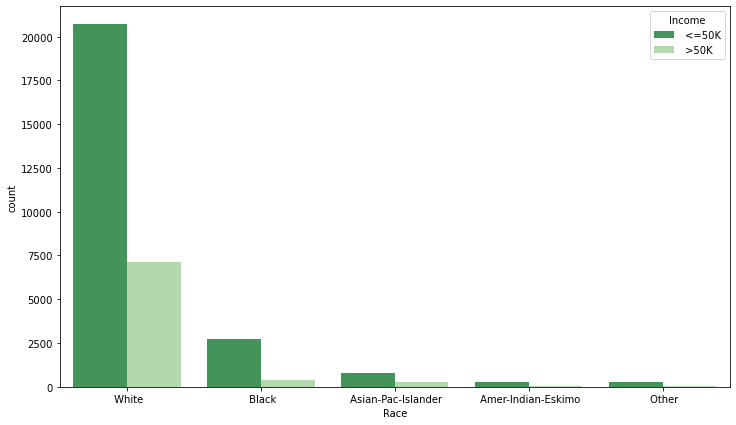

In [98]:
#checking Income of Individuals of Different Race
plt.figure(figsize=(12,7))
sns.countplot(df["Race"],hue=df["Income"],palette="Greens_r")
plt.show()

An important point to notice over here is that, except Whites there are very few people of different races.

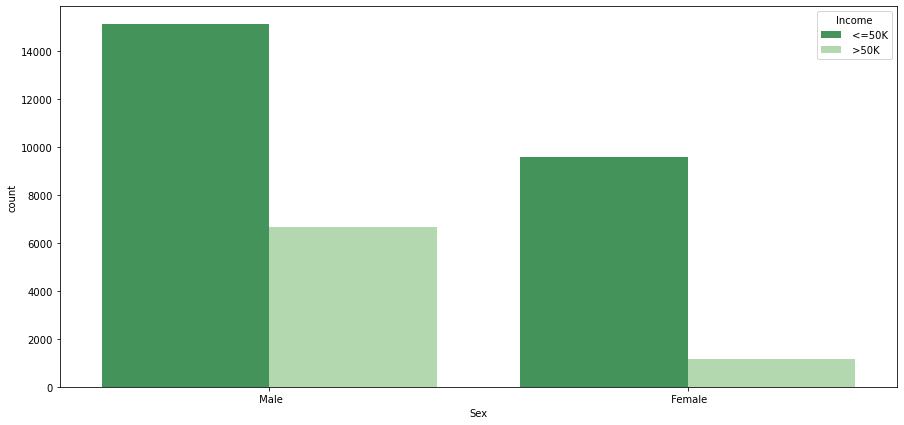

In [99]:
#checking Income of Individuals of Different Sex
plt.figure(figsize=(15,7))
sns.countplot(df["Sex"],hue=df["Income"],palette="Greens_r")
plt.show()

We can see a significant gap in the earnings between males and females over here.

- For Females, there are less than 10% of the adults earning more than 50K dollars an year.
- In case of Males there are close to 33% of them earning more than 50K dollars an year.

### Bivariate Analysis

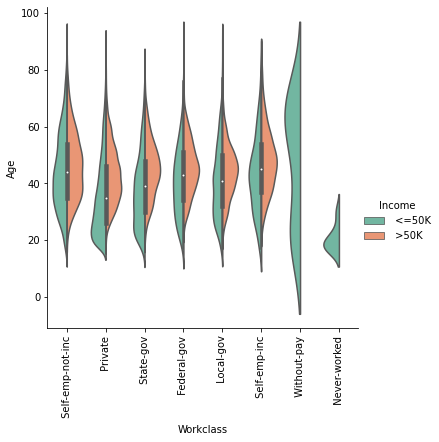

In [100]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

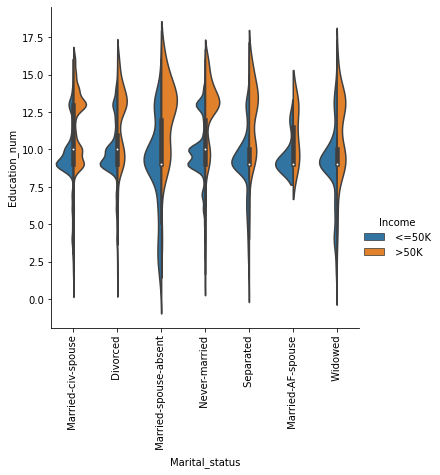

In [101]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

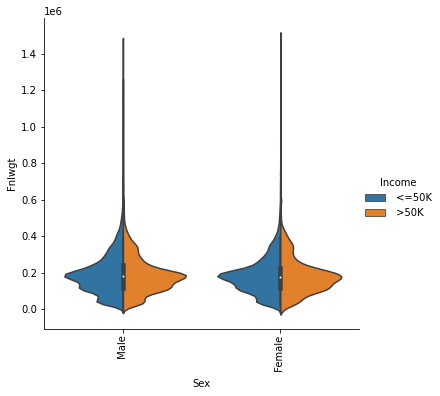

In [102]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.

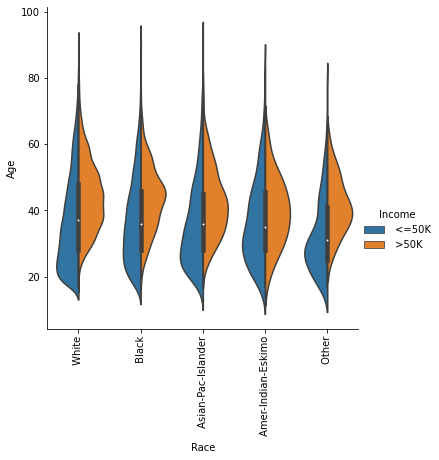

In [103]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

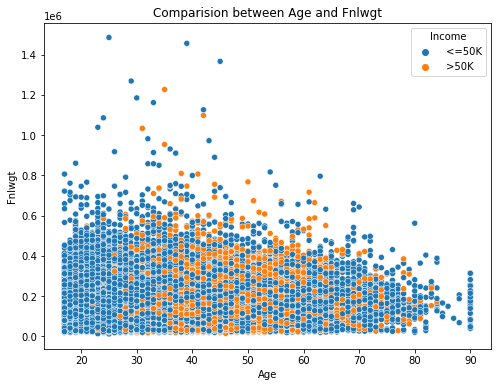

In [104]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);


As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

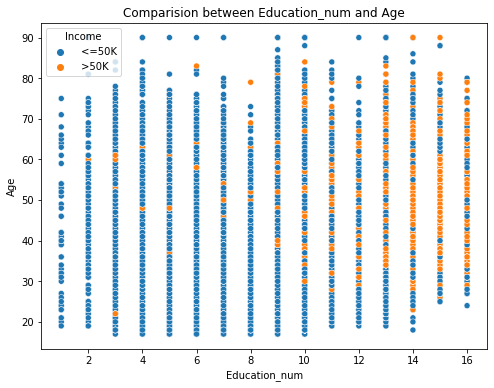

In [105]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

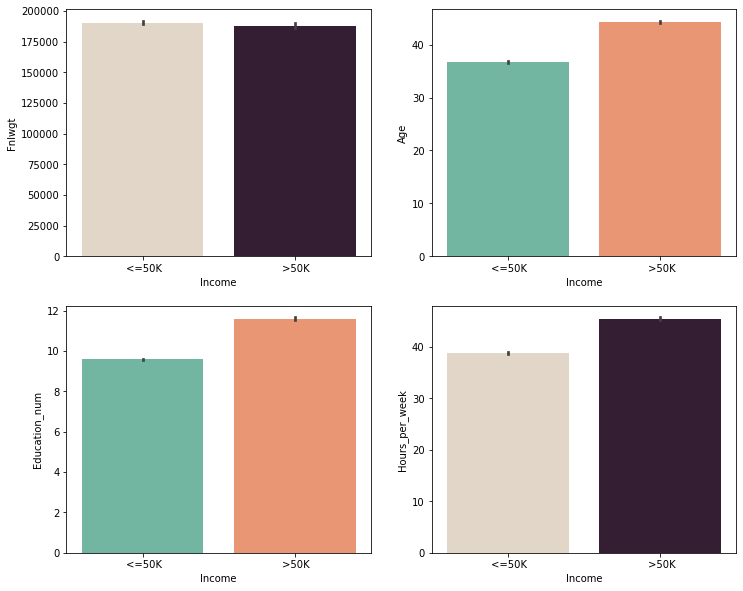

In [106]:
#Using barplot to compare feature with target
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

- With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.
- With Age the chance of getting >50k is high compared to chance of getting income <=50k.
- With Education_num the chance of getting income >50k is very high than <=50k.
- With hours_per_week also the chance of getting income >50k is high.

In [107]:
#Encoding my target so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

In [108]:
df.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [109]:
#describing the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observation:
- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 38.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [110]:
#Checking the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

I notice, in Capital_gain column there are 92% zero values so let me drop this column.

In [111]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

In [112]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

I notice, in Capital_loss column there are 95% zero values so let me drop this column.

In [113]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

I've successfully removed the unwanted features.

In [114]:
#Dropping Education column as we already have Education_num with same values in integer type.
df = df.drop(["Education"],axis=1)

Successfully dropped the repeated feature.

<AxesSubplot:>

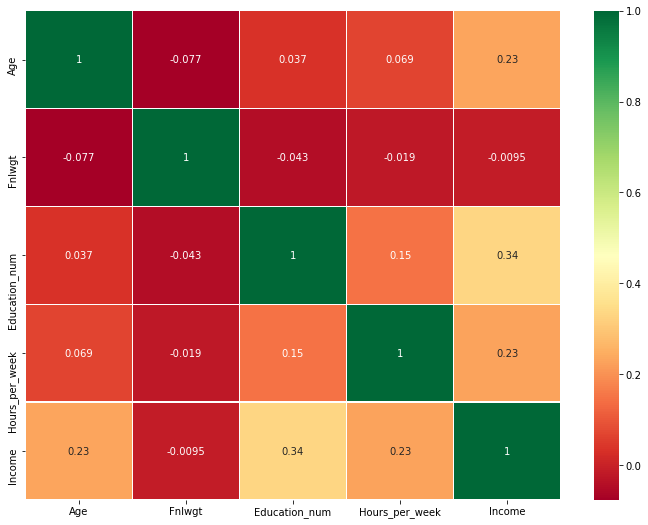

In [115]:
#Plotting heatmap with all features
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that most of the features are positively correlated with the Income Variable.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

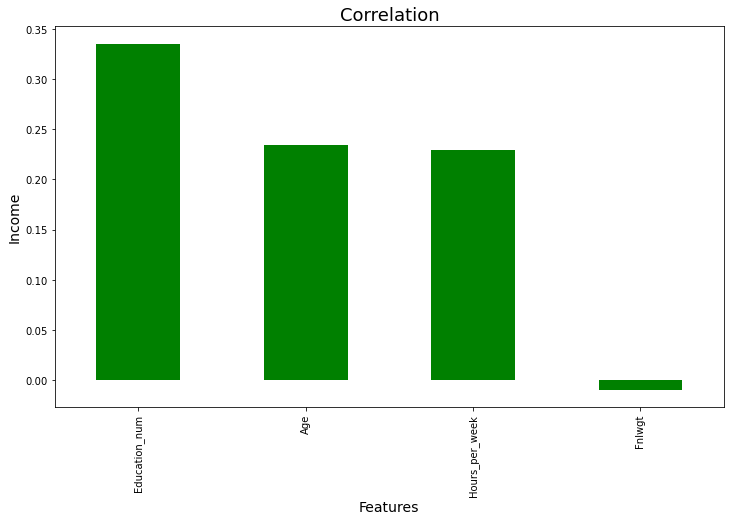

In [116]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(12,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

I notice that all the numerical features are positively correlated.
- Education_num shows greater correlation than other features.
- Fnlwgt shows no relation with target.

<Figure size 432x288 with 0 Axes>

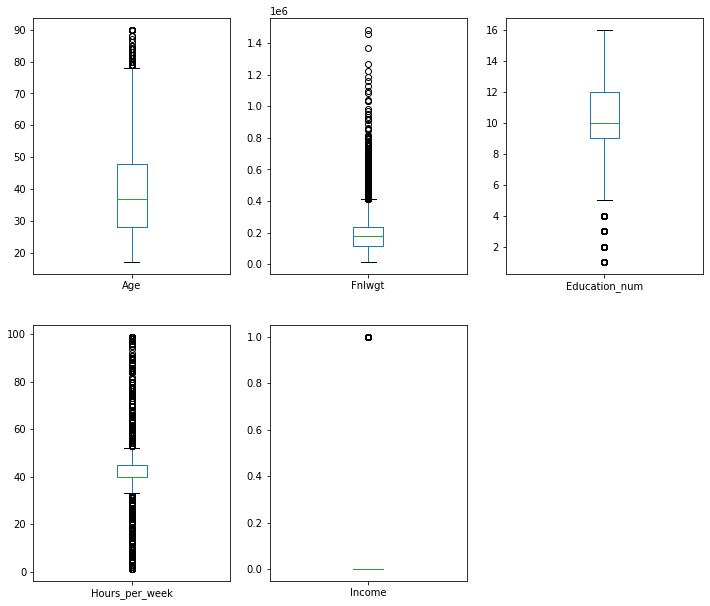

In [117]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,16))
plt.show()

In [118]:
df.columns[df.dtypes != "object"]

Index(['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week', 'Income'], dtype='object')

As observed from boxplot, there is skewness present in numeric columns and I need to remove this. 

    'Age' - Continuous
    'Fnlwgt' - Continuous
    'Education_num' - Categorical
    'Hours_per_week' - Continuous
    'Income' - Target - No need to remove skewness.

## Data cleaning

### Treating Outliers

##### Zscore:

In [119]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[['Age','Fnlwgt','Hours_per_week']]

In [120]:
#Using Zscore to remove outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(31668, 12)

In [121]:
#previous shape
df.shape

(32560, 12)

I've succefully removed the outliers using zscore and rows in my new dataset are 31668 whereas previously we had 32560 rows.

In [122]:
#Checking the data loss
((32560-31668)/32560)*100

2.7395577395577395

So I get data loss of 2.7% hence I'll proceed with zscore.

### Treating Skewness

In [123]:
#check skewness
df1.skew()

Age               0.470790
Fnlwgt            0.634065
Education_num    -0.310166
Hours_per_week   -0.338625
Income            1.215051
dtype: float64

Keeping skewness range as +/-0.5
I can see the skewness in Fnlwgt. Hence, I need to remove that.

In [124]:
#Creating list of all the columns with skewness
cols=['Fnlwgt']

In [125]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

Age               0.470790
Fnlwgt           -0.034511
Education_num    -0.310166
Hours_per_week   -0.338625
Income            1.215051
dtype: float64

I can notice that skewness has been removed. Let me check the distribution. 

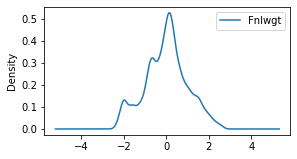

In [126]:
#Checking distribution with density graph
df1[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,3),figsize=(15,8))
plt.show()

My continuous features now looks normally distributed.

### Encoding

In [127]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df1.columns[df1.dtypes == "object"]

In [128]:
categorical_columns

Index(['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native_country'],
      dtype='object')

In [131]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])   #.astype(str) will embed all values in str type

In [132]:
#checking the columns and its type after encoding
df1[categorical_columns]

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,5,2,3,0,4,1,38
1,3,0,5,1,4,1,38
2,3,2,5,0,2,1,38
3,3,2,9,5,2,0,4
4,3,2,3,5,4,0,38
...,...,...,...,...,...,...,...
32555,3,2,12,5,4,0,38
32556,3,2,6,0,4,1,38
32557,3,6,0,4,4,0,38
32558,3,4,0,3,4,1,38


I've successfully encoded all the categorical columns

### Splitting independent & target variable

In [133]:
X = df1.drop("Income",axis=1)
y = df1["Income"]

### Treating class imbalance

In [134]:
#Treating Class imbalance in target
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    24055
0    24055
Name: Income, dtype: int64

I can see that the target column was balanced using SMOTE

### SCALING

In [135]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is categorical data
from sklearn.model_selection import train_test_split, cross_val_score

In [136]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [141]:
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.773140,1.799787,-1.184997,0.978717,-0.307026,-0.800622,-0.717091,0.368708,0.623037,-2.629892,0.249145
1,-0.176600,-0.037931,0.451856,-0.603237,-1.830990,-0.293300,-0.099787,0.368708,0.623037,-0.152514,0.249145
2,1.010575,-0.037931,0.643129,-1.394214,-0.307026,-0.293300,-0.717091,-2.140102,0.623037,-0.152514,0.249145
3,-0.968050,-0.037931,1.577956,0.978717,-0.307026,0.721344,2.369427,-2.140102,-1.605040,-0.152514,-5.491456
4,-0.255745,-0.037931,1.112082,1.374205,-0.307026,-0.800622,2.369427,0.368708,-1.605040,-0.152514,0.249145
...,...,...,...,...,...,...,...,...,...,...,...
48105,-0.809760,-0.037931,0.206537,-0.207749,1.216938,-1.054283,1.134820,0.368708,0.623037,-0.152514,0.249145
48106,-0.651470,-0.037931,-0.556924,0.978717,0.454956,-0.800622,-0.717091,0.368708,0.623037,1.223807,0.249145
48107,-0.097455,-0.037931,-0.065400,-0.603237,1.216938,-1.054283,-0.099787,0.368708,0.623037,-0.152514,0.249145
48108,-0.176600,-0.956790,-2.099777,-0.603237,-0.307026,0.975005,-0.717091,0.368708,0.623037,-0.152514,0.249145


The data looks scaled now. 

### FIND BEST random_state 

In [142]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LogisticRegression()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7532737476616088  on Random_state  171


In [143]:
#Splitting the dataset for training and testing and using best random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = maxRS)

### Algorithms

In [144]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [145]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7533
CROSS VALIDATION SCORE: 0.744211182706298
CONFUSION MATRIX:
[[5211 1946]
 [1615 5661]]
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.763405     0.744183  0.753274      0.753794      0.753715
recall        0.728098     0.778037  0.753274      0.753068      0.753274
f1-score      0.745334     0.760734  0.753274      0.753034      0.753097
support    7157.000000  7276.000000  0.753274  14433.000000  14433.000000


####  Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8677
CROSS VALIDATION SCORE: 0.8701517356059032
CONFUSION MATRIX:
[[5984 1173]
 [ 737 6539]]
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.890344     0.847899  0.867664      0.869122      0.868947
recall        0.836105     0.898708  0.867664      0.867406      0.867664
f1-score      0.862372     0.872565  0.867664      0.867468      0.867510
support    7157.000000  7276.000000  0.867664  14433.000000  14433.000000


#### Support Vector Machine

In [147]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7563
CROSS VALIDATION SCORE: 0.7482643940968614
CONFUSION MATRIX:
[[5020 2137]
 [1380 5896]]
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.784375     0.733972  0.756322      0.759174      0.758966
recall        0.701411     0.810335  0.756322      0.755873      0.756322
f1-score      0.740577     0.770266  0.756322      0.755421      0.755544
support    7157.000000  7276.000000  0.756322  14433.000000  14433.000000


#### AdaBoost

In [148]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8258
CROSS VALIDATION SCORE: 0.8173768447308252
CONFUSION MATRIX:
[[5672 1485]
 [1029 6247]]
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.846441     0.807941  0.825816      0.827191      0.827032
recall        0.792511     0.858576  0.825816      0.825543      0.825816
f1-score      0.818589     0.832489  0.825816      0.825539      0.825596
support    7157.000000  7276.000000  0.825816  14433.000000  14433.000000


I got the accuracy_score & cross validation scores of all the algorithms
On checking the difference between accuracy_score & cross_val_score, I found that RandomForestClassifier has least difference and best accuracy. Hence, I will tune this model.

## HYPERPARAMETER TUNING

In [149]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [152]:
#RandomForestClassifier Tuning

#Creating RandomForestClassifier parameters dictionary

param_grid = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300],
             'max_features': ["auto","sqrt","log2"]}

In [153]:
#Create a GridSearchCV object and fit it to the training data
rf_hp = GridSearchCV(RandomForestClassifier(),param_grid,refit=True)   #or cv=5
rf_hp.fit(X_train,y_train)
rf_hp.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 300}

In [158]:
#Using the best parameters
final_mod = RandomForestClassifier( criterion='gini', max_depth=25, n_estimators=300, max_features='log2')
final_mod.fit(X_train,y_train)
evaluate(final_mod, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8714
CROSS VALIDATION SCORE: 0.8713988775722303
CONFUSION MATRIX:
[[5917 1240]
 [ 616 6660]]
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.905709     0.843038  0.871406      0.874374      0.874115
recall        0.826743     0.915338  0.871406      0.871041      0.871406
f1-score      0.864427     0.877702  0.871406      0.871064      0.871119
support    7157.000000  7276.000000  0.871406  14433.000000  14433.000000


### After tuning, the accuracy increased to 87.14%

## ROC-AUC Curve

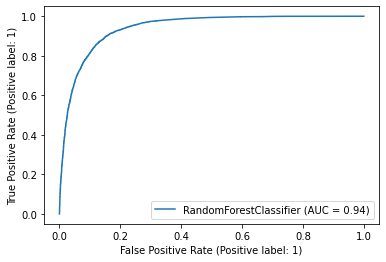

In [160]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(RF) is 0.94

## SERIALIZATON (Saving model)

In [161]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"census_income.pkl")

['census_income.pkl']

### Done :)